In [18]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

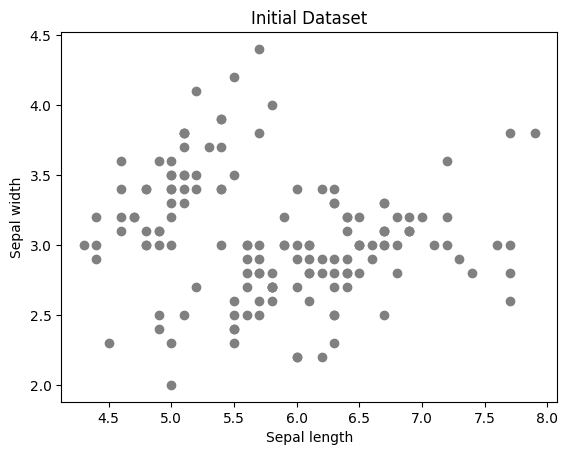

In [19]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title('Initial Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [46]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array(
            [
                [self.euclidean_distance(x, centroid) for centroid in self.centroids]
                for x in data
            ]
        )
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        # print('data: ', data[self.clusters == 0])
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)
            # print("Clusters: ", self.clusters)
            # self.plot_clusters(data, i)
            new_centroids = self.update_centroids(data)
            print("New centroids: ", new_centroids)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        plt.scatter(
            data[:, 0],
            data[:, 1],
            c=self.clusters,
            cmap="viridis",
            marker="o",
            alpha=0.6,
        )
        plt.scatter(
            self.centroids[:, 0], self.centroids[:, 1], s=300, c="red", marker="z"
        )
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(
            data[:, 0],
            data[:, 1],
            c=self.clusters,
            cmap="viridis",
            marker="o",
            alpha=0.6,
        )
        plt.scatter(
            self.centroids[:, 0], self.centroids[:, 1], s=200, c="red", marker="x"
        )
        plt.title("Final Clusters and Centroids")
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.show()

New centroids:  [[6.25714286 2.80714286]
 [5.5875     3.9625    ]
 [7.66666667 3.        ]
 [6.13571429 3.12857143]
 [6.61       2.9       ]
 [4.93095238 3.35238095]
 [5.32666667 2.70666667]
 [6.94210526 3.18421053]
 [6.18333333 2.31666667]
 [5.6375     2.5625    ]]
New centroids:  [[6.23571429 2.79285714]
 [5.49       3.92      ]
 [7.625      3.0875    ]
 [6.14666667 3.16      ]
 [6.63333333 2.96666667]
 [4.89487179 3.33076923]
 [5.16363636 2.6       ]
 [6.95833333 3.19166667]
 [6.18333333 2.31666667]
 [5.665      2.65      ]]
New centroids:  [[6.22       2.8       ]
 [5.4        3.89230769]
 [7.625      3.0875    ]
 [6.15714286 3.17857143]
 [6.63333333 2.96666667]
 [4.87777778 3.29166667]
 [4.94285714 2.38571429]
 [6.95833333 3.19166667]
 [6.18333333 2.31666667]
 [5.64583333 2.70416667]]
New centroids:  [[6.22       2.8       ]
 [5.38125    3.81875   ]
 [7.625      3.0875    ]
 [6.15714286 3.17857143]
 [6.63333333 2.96666667]
 [4.83939394 3.27272727]
 [4.94285714 2.38571429]
 [6.9583

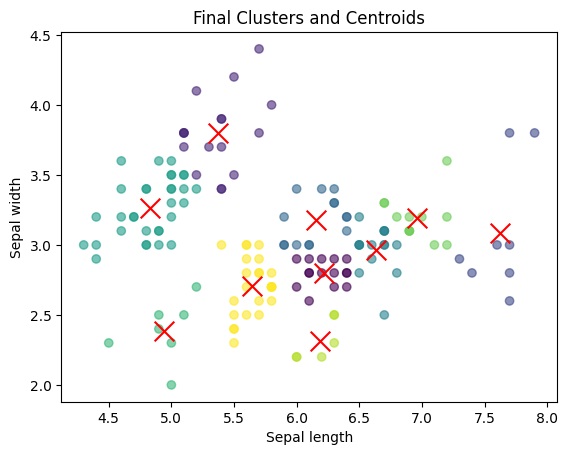

In [47]:
kmeans=KMeans(k=10, max_iters=100)
kmeans.fit(data)